In [35]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [36]:
theta = np.array([30.7,44.0,54.6,64.0,72.6,80.9,97.1,105.3,113.8,123.0,133.2])/2.
dhkl = 0.15418*10**(-9)/(2*np.sin((theta/180.)*np.pi))
np.set_printoptions(precision=3)
print('$d_{hkl}$', dhkl*10**10)

$d_{hkl}$ [2.912 2.058 1.681 1.455 1.302 1.188 1.029 0.97  0.92  0.877 0.84 ]


In [37]:
onePerdhlSqr = 1/dhkl**2
print('$\frac{1}{d_{hkl}^{2}}$', onePerdhlSqr)

$rac{1}{d_{hkl}^{2}}$ [1.179e+19 2.361e+19 3.540e+19 4.725e+19 5.897e+19 7.083e+19 9.453e+19
 1.063e+20 1.181e+20 1.300e+20 1.417e+20]


In [38]:
print('N', onePerdhlSqr/onePerdhlSqr[0])

N [ 1.     2.003  3.002  4.007  5.002  6.007  8.017  9.018 10.015 11.022
 12.02 ]


In [39]:
theta2 = np.array([38.3, 44.52, 64.75, 77.76, 81.95, 98.38, 111.15, 115.56, 135.9])/2.
dhkl2 = 0.15418*10**(-9)/(2*np.sin((theta2/180.)*np.pi))
print('$d_{hkl}$', dhkl2*10**10)

$d_{hkl}$ [2.35  2.035 1.44  1.228 1.176 1.019 0.935 0.911 0.832]


In [40]:
N = np.array([3., 4., 8.,11.,12.,16., 19., 20., 24. ])
ahkl = np.sqrt(N*dhkl2**2)
print(ahkl*10**10)

[4.07  4.07  4.072 4.073 4.073 4.074 4.074 4.075 4.075]


Tengelymetszet, hiba:  [-9.542e-14  4.075e-10] [1.128e-14 3.010e-14]


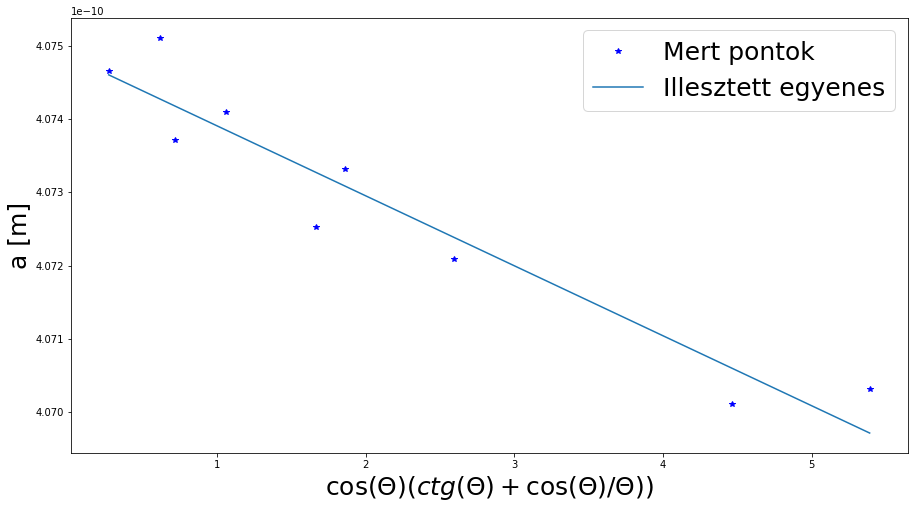

In [41]:
def hocuspocus(theta):
    thetan = np.radians(theta)
    return np.cos(thetan)*(1/np.tan(thetan) + np.cos(thetan)/thetan)

plt.figure(figsize(15,8))

plt.plot(hocuspocus(theta2), ahkl,'b*')

from scipy.optimize import curve_fit 

def egyenes(x, m, b):
    return m*x + b

popt, pcov = curve_fit(egyenes, hocuspocus(theta2), ahkl)
perr = sqrt(diag(pcov))

plt.plot(hocuspocus(theta2), egyenes(hocuspocus(theta2), *popt))

xlabel('$\cos(\Theta)(ctg(\Theta) + \cos(\Theta)/\Theta))$',fontsize=25)
ylabel('a [m]',fontsize=25)

plt.legend(('Mert pontok','Illesztett egyenes'), loc='upper right', fontsize=25)

print('Tengelymetszet, hiba: ',popt, perr)

savefig('./egyenes.png')

In [42]:
theta3 = np.array([43.846, 75.247, 91.471, 119.564, 140.826])/2.
dhkl3 = 0.15418*10**(-9)/(2*np.sin((theta3/180.)*np.pi))
print(dhkl3)

[2.065e-10 1.263e-10 1.076e-10 8.921e-11 8.182e-11]


In [43]:
print('Félértékszélesség', 0.2985)
betaF = np.sqrt((0.2985**2-0.1**2))*np.pi/180.
atlSzemcsemeret = 4*0.15418*10**(-9)/(3*betaF*cos(43.846*np.pi/180))
print(atlSzemcsemeret)

Félértékszélesség 0.2985
5.806797484981999e-08


[6.054 6.054 6.054]


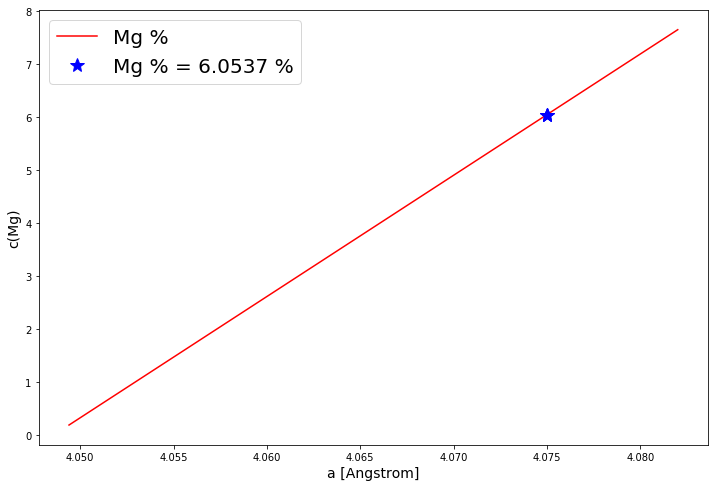

In [46]:
atMg = np.array([0, 0.166, 0.35, 0.69, 1.01, 1.99, 2.38, 2.75, 2.99, 3.37, 4.01, 6.71, 7.63])
aA = np.array([0.40494, 0.40496, .405, .40513, .40526, .40572, .40588, .40603, .40616, .40631, .40658, .40782, .4082])*10

plt.figure(figsize(12,8))

popt, pcov = curve_fit(egyenes, aA, atMg)

plt.plot(aA, egyenes(aA, *popt), 'r')

print(egyenes(np.array([-perr[1]+4.075, 4.075, 4.075 + perr[1]]), *popt))

plt.plot(np.array([-perr[1]+4.075, 4.075, 4.075 + perr[1]]), egyenes(np.array([-perr[1]+4.075, 4.075, 4.075 + perr[1]]), *popt), 'b*', ms=15)

plt.legend(('Mg %', 'Mg % = 6.0537 %'), loc='upper left', fontsize=20)

xlabel('a [Angstrom]', fontsize=14)
ylabel('c(Mg)', fontsize=14)

savefig('./konc.png')